In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!pip install imagecodecs

In [4]:
import os
import cv2
import numpy as np


In [5]:
data_num = {}
for i in os.listdir("/content/drive/MyDrive/New Dataset"):
  try:
    c = len(os.listdir(os.path.join("/content/drive/MyDrive/New Dataset",i)))
    print(i+": "+str(c))
    data_num[i] = c
  except:
    pass

Extra Teeth: 607
Dental Caries: 788
Bone Loss: 894


In [ ]:
# def flip_image(image,dir):
#     image = cv2.flip(image, dir)
#     cv2.imwrite(Folder_name + "/flip-" + str(dir)+Extension, image)
# folder_path = "/content/drive/MyDrive/New Dataset/Extra Teeth"
# for img in os.listdir(folder_path):
#     simg_path = os.path.join(folder_path,img)
#     print(simg_path)


#     image_file=simg_path
#     Folder_name=folder_path
#     Extension=image_file.split("/")[-1]
#     image=cv2.imread(image_file)

#     flip_image(image,-1)#both



In [ ]:
# def flip_image(image,dir):
#     image = cv2.flip(image, dir)
#     cv2.imwrite(Folder_name + "/flip-" + str(dir)+Extension, image)
# folder_path = "/content/drive/MyDrive/New Dataset/Bone Lost"
# for img in os.listdir(folder_path):
#     simg_path = os.path.join(folder_path,img)
#     print(simg_path)


#     image_file=simg_path
#     Folder_name=folder_path
#     Extension=image_file.split("/")[-1]
#     image=cv2.imread(image_file)

#     flip_image(image,-1)#both



In [ ]:
# def flip_image(image,dir):
#     image = cv2.flip(image, dir)
#     cv2.imwrite(Folder_name + "/flip-" + str(dir)+Extension, image)
# folder_path = "/content/drive/MyDrive/New Dataset/Dental Caries"
# for img in os.listdir(folder_path):
#     simg_path = os.path.join(folder_path,img)
#     print(simg_path)


#     image_file=simg_path
#     Folder_name=folder_path
#     Extension=image_file.split("/")[-1]
#     image=cv2.imread(image_file)

#     flip_image(image,-1)#both



In [6]:
data_num = {}
for i in os.listdir("/content/drive/MyDrive/New Dataset"):
  try:
    c = len(os.listdir(os.path.join("/content/drive/MyDrive/New Dataset",i)))
    print(i+": "+str(c))
    data_num[i] = c
  except:
    pass

Extra Teeth: 607
Dental Caries: 788
Bone Loss: 894


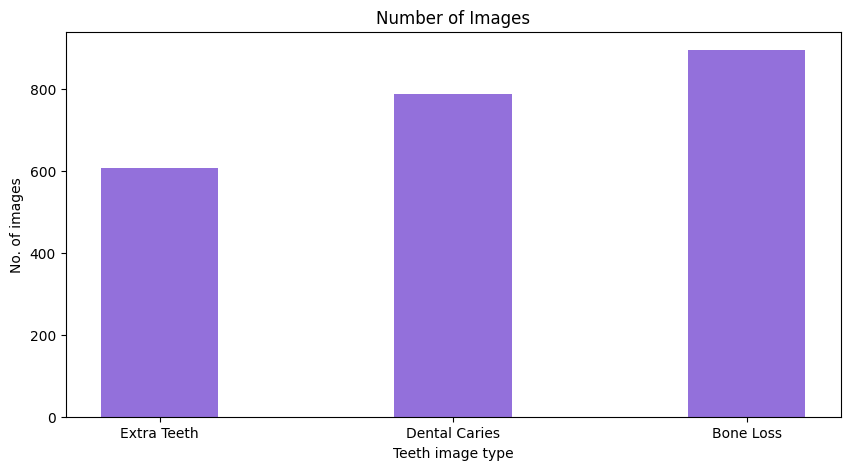

In [7]:
import numpy as np
import matplotlib.pyplot as plt


# creating the dataset
data = data_num
courses = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(courses, values, color ='mediumpurple',
        width = 0.4)

plt.xlabel("Teeth image type")
plt.ylabel("No. of images")
plt.title("Number of Images")
plt.show()

In [8]:


import cv2
from skimage.exposure import rescale_intensity
from skimage.segmentation import slic
from skimage.util import img_as_float
from skimage import io
import numpy as np



#RESIZE
def resize_image(image,w,h):
    image=cv2.resize(image,(w,h))
    cv2.imwrite(Folder_name+"/Resize-"+str(w)+"*"+str(h)+Extension, image)

#crop
def crop_image(image,y1,y2,x1,x2):
    image=image[y1:y2,x1:x2]
    cv2.imwrite(Folder_name+"/Crop-"+str(x1)+str(x2)+"*"+str(y1)+str(y2)+Extension, image)

def padding_image(image,topBorder,bottomBorder,leftBorder,rightBorder,color_of_border=[0,0,0]):
    image = cv2.copyMakeBorder(image,topBorder,bottomBorder,leftBorder,
        rightBorder,cv2.BORDER_CONSTANT,value=color_of_border)
    cv2.imwrite(Folder_name + "/padd-" + str(topBorder) + str(bottomBorder) + "*" + str(leftBorder) + str(rightBorder) + Extension, image)

def flip_image(image,dir):
    image = cv2.flip(image, dir)
    cv2.imwrite(Folder_name + "/flip-" + str(dir)+Extension, image)

def superpixel_image(image,segments):
    seg=segments

    def segment_colorfulness(image, mask):

        (B, G, R) = cv2.split(image.astype("float"))
        R = np.ma.masked_array(R, mask=mask)
        G = np.ma.masked_array(B, mask=mask)
        B = np.ma.masked_array(B, mask=mask)


        rg = np.absolute(R - G)


        yb = np.absolute(0.5 * (R + G) - B)


        stdRoot = np.sqrt((rg.std() ** 2) + (yb.std() ** 2))
        meanRoot = np.sqrt((rg.mean() ** 2) + (yb.mean() ** 2))


        return stdRoot + (0.3 * meanRoot)

    orig = cv2.imread(image)
    vis = np.zeros(orig.shape[:2], dtype="float")


    image = io.imread(image)
    segments = slic(img_as_float(image), n_segments=segments,
                    slic_zero=True)
    for v in np.unique(segments):

        mask = np.ones(image.shape[:2])
        mask[segments == v] = 0


        C = segment_colorfulness(orig, mask)
        vis[segments == v] = C

    vis = rescale_intensity(vis, out_range=(0, 255)).astype("uint8")


    alpha = 0.6
    overlay = np.dstack([vis] * 3)
    output = orig.copy()
    cv2.addWeighted(overlay, alpha, output, 1 - alpha, 0, output)

    cv2.imwrite(Folder_name + "/superpixels-" + str(seg) + Extension, output)

def invert_image(image,channel):

    image=(channel-image)
    cv2.imwrite(Folder_name + "/invert-"+str(channel)+Extension, image)

def add_light(image, gamma=1.0):
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255
                      for i in np.arange(0, 256)]).astype("uint8")

    image=cv2.LUT(image, table)
    if gamma>=1:
        cv2.imwrite(Folder_name + "/light-"+str(gamma)+Extension, image)
    else:
        cv2.imwrite(Folder_name + "/dark-" + str(gamma) + Extension, image)

def add_light_color(image, color, gamma=1.0):
    invGamma = 1.0 / gamma
    image = (color - image)
    table = np.array([((i / 255.0) ** invGamma) * 255
                      for i in np.arange(0, 256)]).astype("uint8")

    image=cv2.LUT(image, table)
    if gamma>=1:
        cv2.imwrite(Folder_name + "/light_color-"+str(gamma)+Extension, image)
    else:
        cv2.imwrite(Folder_name + "/dark_color" + str(gamma) + Extension, image)

def saturation_image(image,saturation):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    v = image[:, :, 2]
    v = np.where(v <= 255 - saturation, v + saturation, 255)
    image[:, :, 2] = v

    image = cv2.cvtColor(image, cv2.COLOR_HSV2BGR)
    cv2.imwrite(Folder_name + "/saturation-" + str(saturation) + Extension, image)

def hue_image(image,saturation):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    v = image[:, :, 2]
    v = np.where(v <= 255 + saturation, v - saturation, 255)
    image[:, :, 2] = v

    image = cv2.cvtColor(image, cv2.COLOR_HSV2BGR)
    cv2.imwrite(Folder_name +"/hue-" + str(saturation) + Extension, image)




In [9]:

import numpy as np
import tensorflow as tf
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image
import keras
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.applications.vgg19 import VGG19, preprocess_input
from keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.applications.resnet50 import preprocess_input
from keras import Model, layers
from keras.models import load_model, model_from_json

In [10]:
#Load the dataset
BATCH_SIZE = 32
IMAGE_SIZE = 299
CHANNELS=3
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/New Dataset',
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 2289 files belonging to 3 classes.


In [11]:
#Class name in my dataset
class_name=dataset.class_names
class_name


['Bone Loss', 'Dental Caries', 'Extra Teeth']

In [12]:
#image shape
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

(32, 299, 299, 3)
[1 1 1 1 1 1 2 0 1 0 2 1 0 1 2 1 2 0 1 2 2 0 0 2 1 1 2 1 1 0 2 1]


In [13]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch[0].numpy())

[[[27.       27.       27.      ]
  [27.       27.       27.      ]
  [27.       27.       27.      ]
  ...
  [54.79599  52.79599  53.79599 ]
  [55.       53.       54.      ]
  [55.       53.       54.      ]]

 [[27.041805 27.041805 27.041805]
  [27.041805 27.041805 27.041805]
  [27.033278 27.033278 27.033278]
  ...
  [54.9342   52.9342   53.9342  ]
  [55.12542  53.12542  54.12542 ]
  [55.12542  53.12542  54.12542 ]]

 [[27.40301  27.40301  27.40301 ]
  [27.40301  27.40301  27.40301 ]
  [27.320791 27.320791 27.320791]
  ...
  [56.128345 54.128345 55.128345]
  [56.20903  54.20903  55.20903 ]
  [56.20903  54.20903  55.20903 ]]

 ...

 [[98.04511  93.04511  97.04511 ]
  [98.04511  93.04511  97.04511 ]
  [98.43642  93.39531  97.33441 ]
  ...
  [90.71879  85.182686 89.182686]
  [91.20902  85.61203  89.61203 ]
  [91.20902  85.61203  89.61203 ]]

 [[92.62702  87.62702  91.62702 ]
  [92.62702  87.62702  91.62702 ]
  [92.57619  87.57192  91.47418 ]
  ...
  [89.708855 83.8484   87.8484  ]
  [9

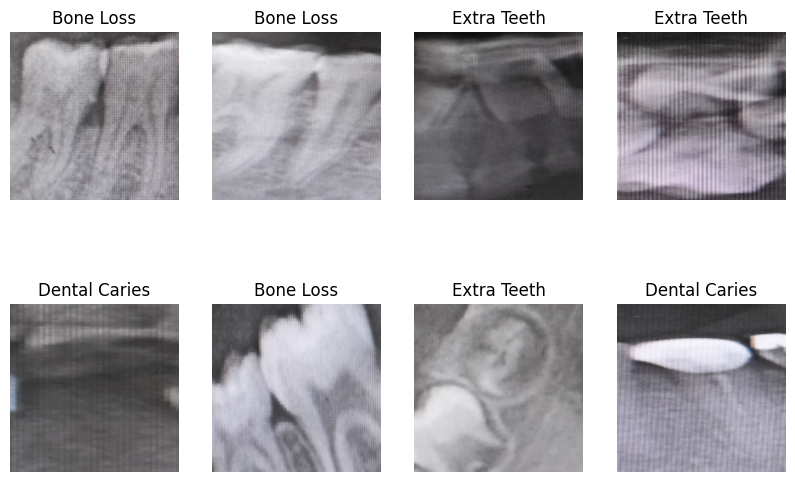

In [14]:
#some data visualization for understanding
plt.figure(figsize=(10,10))
for image_batch, labels_batch in dataset.take(2):
  for i in range(8):
    ax=plt.subplot(3,4,i+1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    plt.title(class_name[labels_batch[i]])
    plt.axis("off")

Splitting

In [15]:
def get_dataset_partitions_tf(ds, train_split=0.7, val_split=0.2, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1

    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)

    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds

In [16]:
train_ds, val_ds, test_ds=get_dataset_partitions_tf(dataset)

In [17]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [18]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])

Model Implementation


# EfficientNetB7

In [56]:
 #model
from tensorflow.keras.applications import EfficientNetB7
conv_base = EfficientNetB7(
    include_top=False,
    weights='imagenet',
    input_shape = (299,299,3))


for layer in conv_base.layers:
    layer.trainable = False


x = conv_base.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dense(1024, activation='relu')(x)
predictions = layers.Dense(3, activation='softmax')(x)
model = Model(conv_base.input, predictions)
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [57]:
#Train the model
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=20
)

Epoch 1/20
50/50 [==============================] - 83s 1s/step - loss: 0.6762 - accuracy: 0.7169 - val_loss: 0.4787 - val_accuracy: 0.7946
Epoch 2/20
50/50 [==============================] - 43s 862ms/step - loss: 0.4407 - accuracy: 0.8231 - val_loss: 0.3645 - val_accuracy: 0.8348
Epoch 3/20
50/50 [==============================] - 42s 843ms/step - loss: 0.3502 - accuracy: 0.8606 - val_loss: 0.3145 - val_accuracy: 0.8728
Epoch 4/20
50/50 [==============================] - 43s 863ms/step - loss: 0.2931 - accuracy: 0.8806 - val_loss: 0.3495 - val_accuracy: 0.8571
Epoch 5/20
50/50 [==============================] - 43s 856ms/step - loss: 0.2728 - accuracy: 0.8956 - val_loss: 0.3514 - val_accuracy: 0.8594
Epoch 6/20
50/50 [==============================] - 43s 861ms/step - loss: 0.2522 - accuracy: 0.8994 - val_loss: 0.2967 - val_accuracy: 0.8996
Epoch 7/20
50/50 [==============================] - 43s 859ms/step - loss: 0.1738 - accuracy: 0.9294 - val_loss: 0.2964 - val_accuracy: 0.9040
Ep

In [58]:
#Testing the model
scores = model.evaluate(test_ds)

8/8 [==============================] - 5s 645ms/step - loss: 0.2098 - accuracy: 0.9414


first image to predict
actual label: Extra Teeth
1/1 [==============================] - 6s 6s/step
predicted label: Extra Teeth


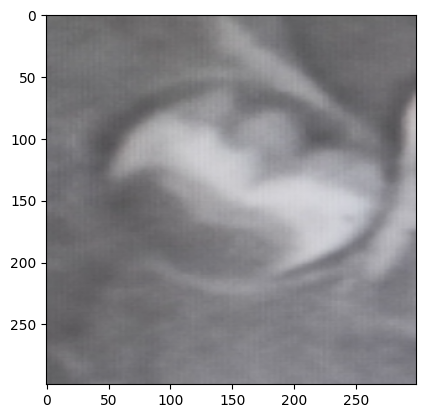

In [59]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_name[first_label])

    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_name[np.argmax(batch_prediction[0])])

In [60]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_name[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 42ms/step


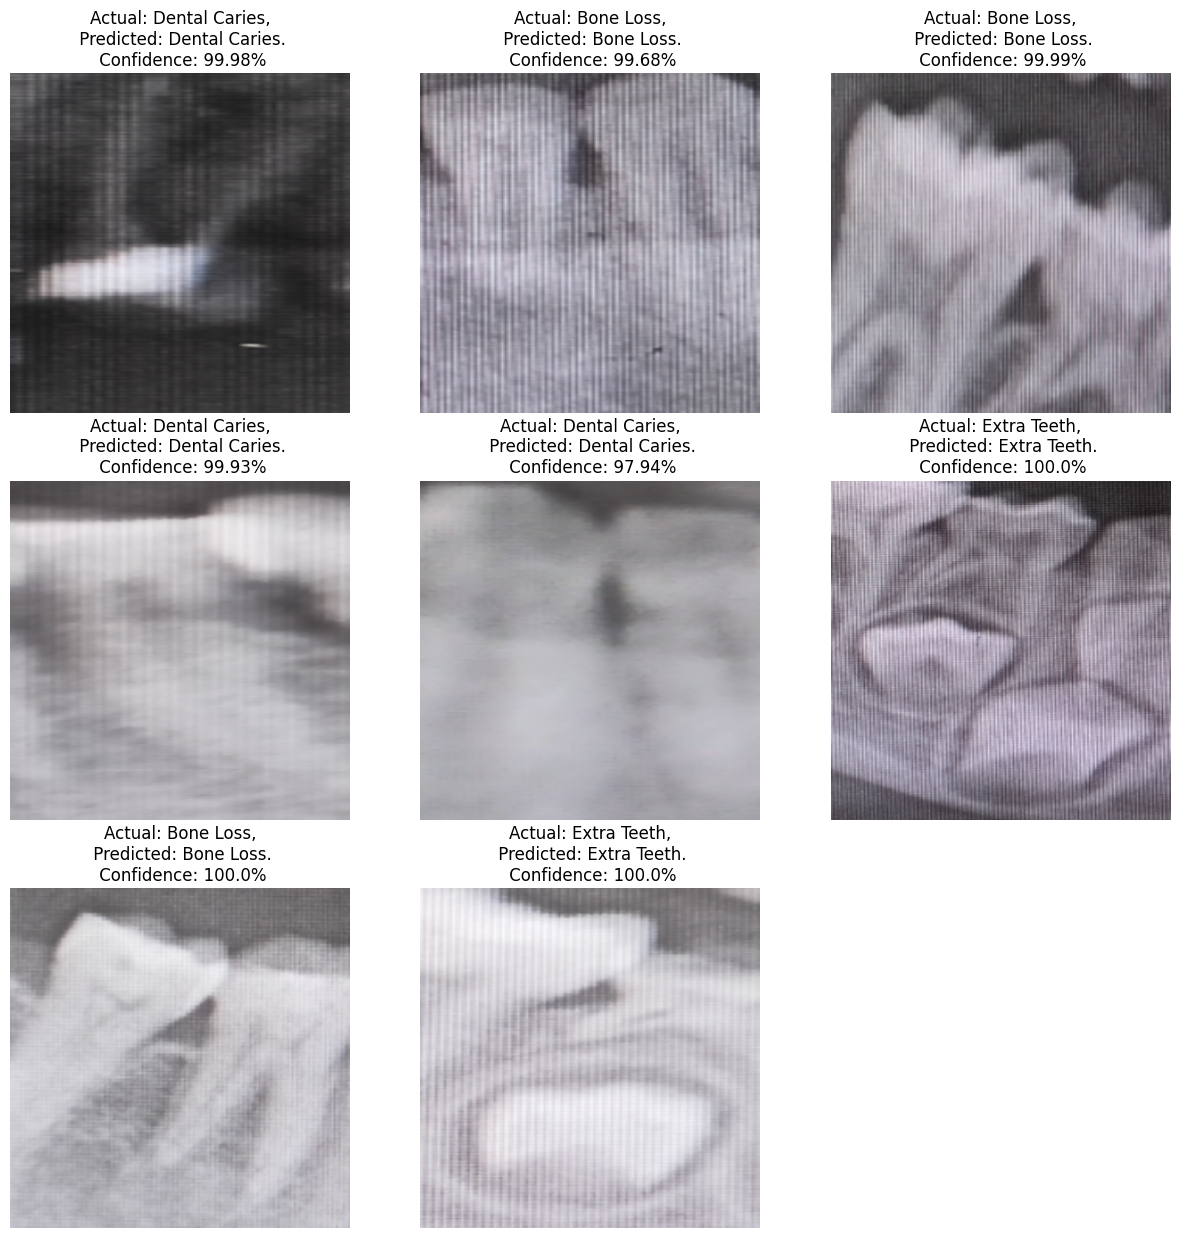

In [61]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(2):
    for i in range(8):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence =predict(model, images[i].numpy())
        actual_class = class_name[labels[i]]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        plt.axis("off")

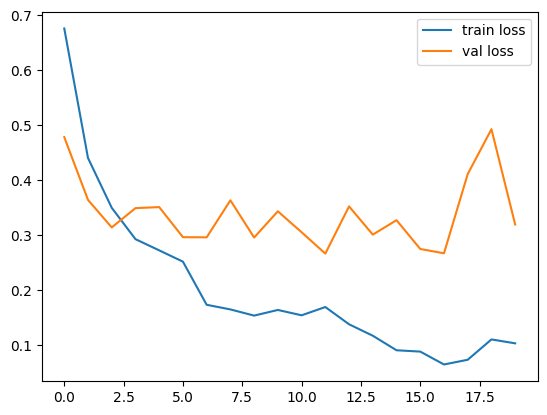

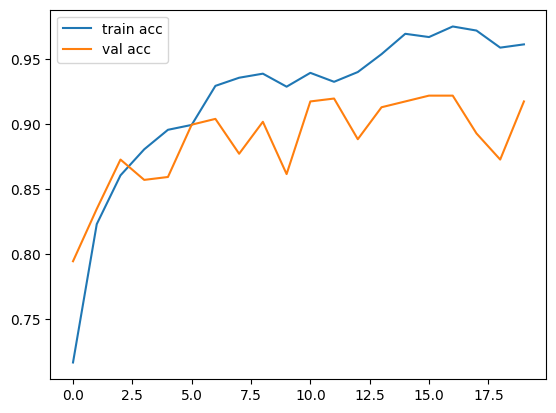

<Figure size 640x480 with 0 Axes>

In [62]:
# plot the loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [63]:
predicted = []
actual = []
for images, labels in test_ds:
  for i in range(8):
    predicted_class, confidence =predict(model, images[i].numpy())
    predicted.append(predicted_class)
    actual.append(class_name[labels[i]])
    # print(predicted_class,class_name[labels[i]])

1/1 [==============================] - 0s 40ms/step


In [64]:
from sklearn.metrics import precision_recall_fscore_support as score
precision, recall, fscore, support = score(actual, predicted)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))

precision: [0.96153846 0.90909091 0.9375    ]
recall: [0.96153846 0.90909091 0.9375    ]
fscore: [0.96153846 0.90909091 0.9375    ]


In [65]:
#creating the confusion matrix
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

con_matrix = confusion_matrix(actual, predicted)
con_matrix

array([[25,  1,  0],
       [ 1, 20,  1],
       [ 0,  1, 15]])

In [66]:
import numpy as np
import matplotlib.pyplot as plt
import itertools

def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:.2}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="black" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="black" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:.2%}; misclass={:.2%}'.format(accuracy, misclass))
    plt.show()

# Example usage:
# Assuming cm is your confusion matrix and target_names is a list of class labels
# plot_confusion_matrix(cm, target_names)


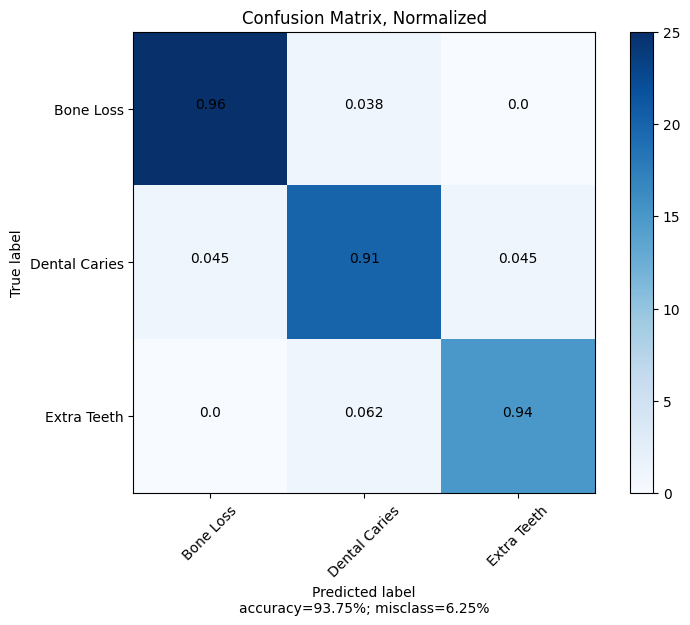

In [67]:
plot_confusion_matrix(cm           = con_matrix,
                      normalize    = True,
                      target_names = class_name,
                      title        = "Confusion Matrix, Normalized")

# Resnet50

In [19]:
#Resnet50 model
conv_base = ResNet50(
    include_top=False,
    weights='imagenet',
    input_shape = (299,299,3))


for layer in conv_base.layers:
    layer.trainable = False


x = conv_base.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.6)(x)
predictions = layers.Dense(3, activation='softmax')(x)
model = Model(conv_base.input, predictions)


model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)


In [20]:
#Train the model
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=20
)

Epoch 1/20
50/50 [==============================] - 38s 409ms/step - loss: 1.1010 - accuracy: 0.6187 - val_loss: 0.6573 - val_accuracy: 0.6942
Epoch 2/20
50/50 [==============================] - 11s 229ms/step - loss: 0.6269 - accuracy: 0.7381 - val_loss: 0.5443 - val_accuracy: 0.7723
Epoch 3/20
50/50 [==============================] - 11s 212ms/step - loss: 0.5368 - accuracy: 0.7806 - val_loss: 0.5211 - val_accuracy: 0.7522
Epoch 4/20
50/50 [==============================] - 11s 215ms/step - loss: 0.4846 - accuracy: 0.7956 - val_loss: 0.5375 - val_accuracy: 0.7634
Epoch 5/20
50/50 [==============================] - 11s 210ms/step - loss: 0.4570 - accuracy: 0.8031 - val_loss: 0.4486 - val_accuracy: 0.8326
Epoch 6/20
50/50 [==============================] - 11s 213ms/step - loss: 0.3952 - accuracy: 0.8369 - val_loss: 0.3980 - val_accuracy: 0.8438
Epoch 7/20
50/50 [==============================] - 11s 218ms/step - loss: 0.3957 - accuracy: 0.8475 - val_loss: 0.3963 - val_accuracy: 0.8415

In [21]:
#Testing the model
scores = model.evaluate(test_ds)

8/8 [==============================] - 13s 175ms/step - loss: 0.2333 - accuracy: 0.8984


first image to predict
actual label: Extra Teeth
1/1 [==============================] - 1s 1s/step
predicted label: Extra Teeth


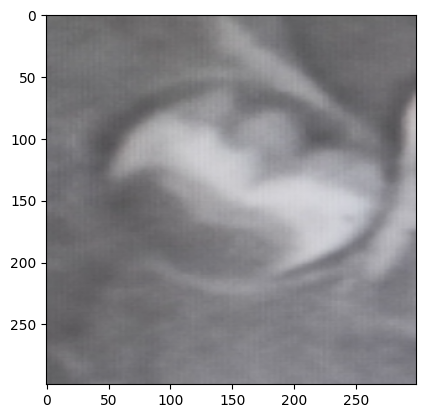

In [22]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_name[first_label])

    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_name[np.argmax(batch_prediction[0])])

In [23]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_name[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 22ms/step


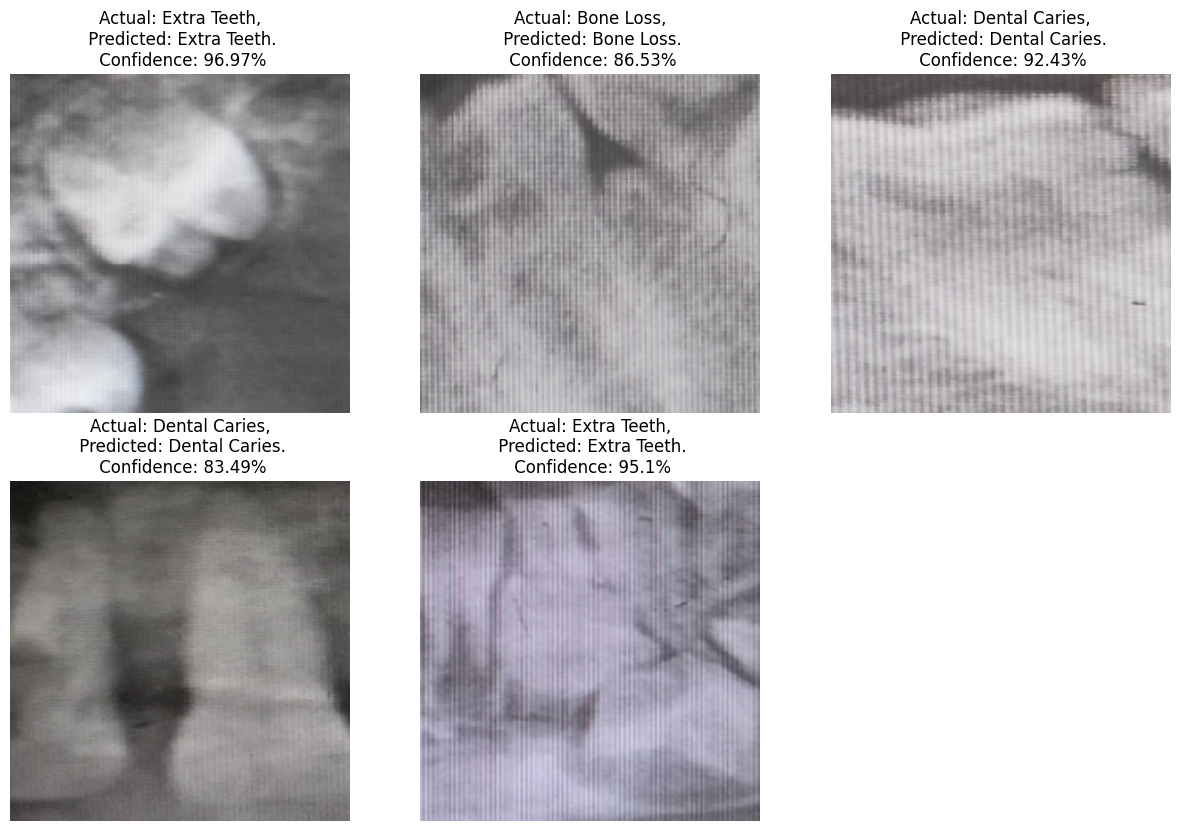

In [24]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(2):
    for i in range(5):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence =predict(model, images[i].numpy())
        actual_class = class_name[labels[i]]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        plt.axis("off")

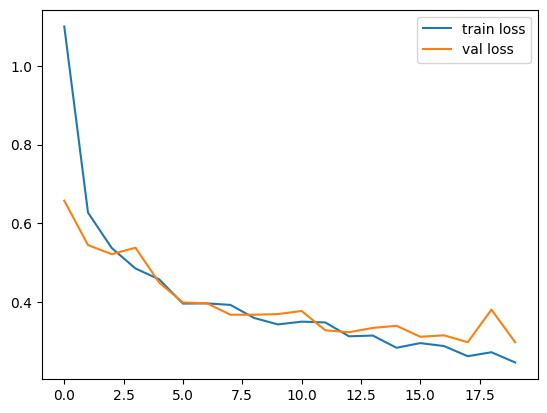

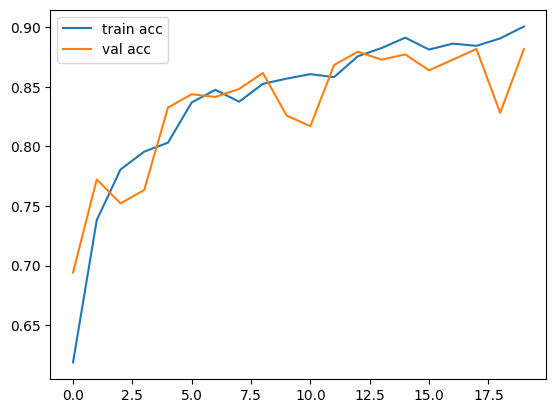

<Figure size 640x480 with 0 Axes>

In [25]:
# plot the loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [26]:
predicted = []
actual = []
for images, labels in test_ds:
  for i in range(5):
    predicted_class, confidence =predict(model, images[i].numpy())
    predicted.append(predicted_class)
    actual.append(class_name[labels[i]])
    print(predicted_class,class_name[labels[i]])

1/1 [==============================] - 0s 43ms/step
Dental Caries Dental Caries
1/1 [==============================] - 0s 36ms/step
Bone Loss Bone Loss
1/1 [==============================] - 0s 35ms/step
Extra Teeth Extra Teeth
1/1 [==============================] - 0s 40ms/step
Dental Caries Dental Caries
1/1 [==============================] - 0s 41ms/step
Extra Teeth Extra Teeth
1/1 [==============================] - 0s 34ms/step
Dental Caries Dental Caries
1/1 [==============================] - 0s 33ms/step
Bone Loss Bone Loss
1/1 [==============================] - 0s 36ms/step
Bone Loss Bone Loss
1/1 [==============================] - 0s 38ms/step
Bone Loss Bone Loss
1/1 [==============================] - 0s 31ms/step
Extra Teeth Extra Teeth
1/1 [==============================] - 0s 41ms/step
Dental Caries Dental Caries
1/1 [==============================] - 0s 39ms/step
Bone Loss Bone Loss
1/1 [==============================] - 0s 33ms/step
Bone Loss Bone Loss
1/1 [===============

In [27]:
from sklearn.metrics import precision_recall_fscore_support as score
precision, recall, fscore, support = score(actual, predicted)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))

precision: [1.   0.75 1.  ]
recall: [0.82352941 1.         0.90909091]
fscore: [0.90322581 0.85714286 0.95238095]


In [28]:
#creating the confusion matrix
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

con_matrix = confusion_matrix(actual, predicted)
con_matrix

array([[14,  3,  0],
       [ 0, 12,  0],
       [ 0,  1, 10]])

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import itertools

def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:.2}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="black" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="black" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:.2%}; misclass={:.2%}'.format(accuracy, misclass))
    plt.show()

# Example usage:
# Assuming cm is your confusion matrix and target_names is a list of class labels
# plot_confusion_matrix(cm, target_names)


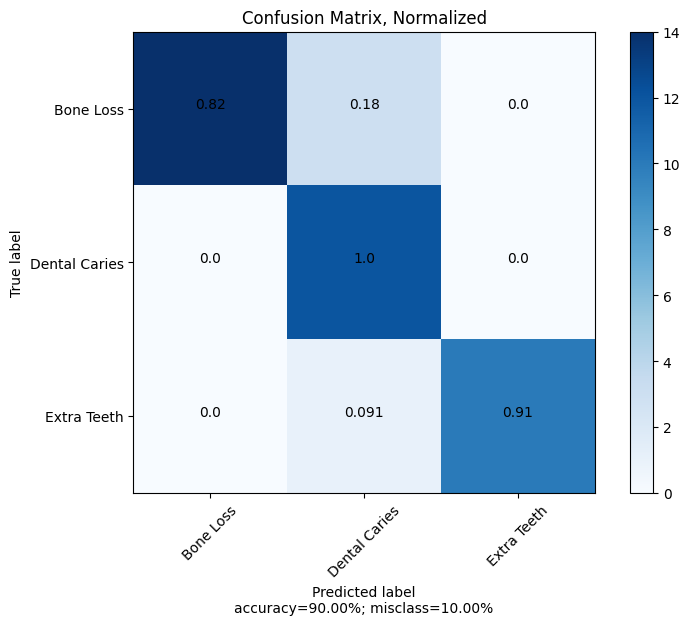

In [30]:
plot_confusion_matrix(cm           = con_matrix,
                      normalize    = True,
                      target_names = class_name,
                      title        = "Confusion Matrix, Normalized")

##VGG 16

In [31]:
#vgg16 model
conv_base = VGG16(
    include_top=False,
    weights='imagenet',
    input_shape = (299,299,3))


for layer in conv_base.layers:
    layer.trainable = False


x = conv_base.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dense(1024, activation='relu')(x)
predictions = layers.Dense(3, activation='softmax')(x)
model = Model(conv_base.input, predictions)
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [32]:
#Train the model
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=20
)

Epoch 1/20
50/50 [==============================] - 29s 341ms/step - loss: 1.2996 - accuracy: 0.5819 - val_loss: 0.6817 - val_accuracy: 0.7054
Epoch 2/20
50/50 [==============================] - 16s 316ms/step - loss: 0.5760 - accuracy: 0.7650 - val_loss: 0.5545 - val_accuracy: 0.7701
Epoch 3/20
50/50 [==============================] - 17s 333ms/step - loss: 0.4475 - accuracy: 0.8194 - val_loss: 0.4562 - val_accuracy: 0.8237
Epoch 4/20
50/50 [==============================] - 16s 322ms/step - loss: 0.3400 - accuracy: 0.8681 - val_loss: 0.4427 - val_accuracy: 0.8259
Epoch 5/20
50/50 [==============================] - 18s 358ms/step - loss: 0.2914 - accuracy: 0.8794 - val_loss: 0.4195 - val_accuracy: 0.8393
Epoch 6/20
50/50 [==============================] - 16s 321ms/step - loss: 0.2569 - accuracy: 0.9025 - val_loss: 0.5025 - val_accuracy: 0.7969
Epoch 7/20
50/50 [==============================] - 16s 320ms/step - loss: 0.2313 - accuracy: 0.9187 - val_loss: 0.3520 - val_accuracy: 0.8817

In [33]:
#Testing the model
scores = model.evaluate(test_ds)

8/8 [==============================] - 2s 249ms/step - loss: 0.3516 - accuracy: 0.9336


first image to predict
actual label: Dental Caries
1/1 [==============================] - 0s 244ms/step
predicted label: Dental Caries


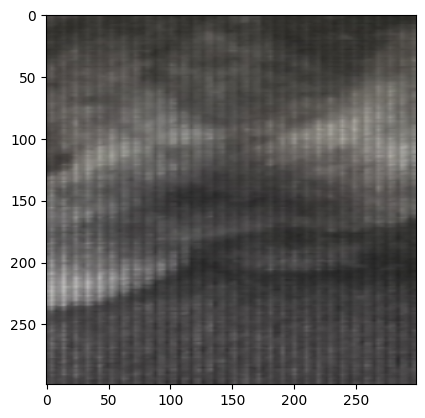

In [34]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_name[first_label])

    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_name[np.argmax(batch_prediction[0])])

In [35]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_name[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 33ms/step


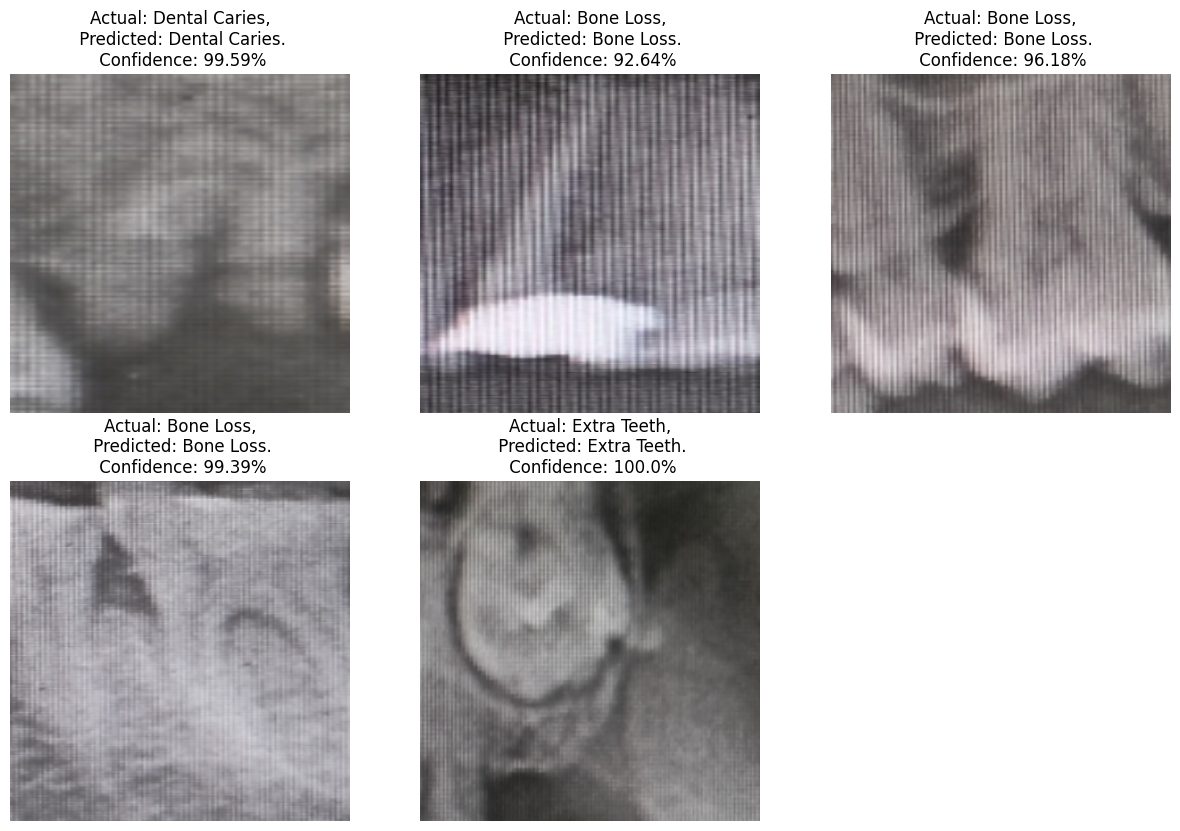

In [36]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(5):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence =predict(model, images[i].numpy())
        actual_class = class_name[labels[i]]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")


        plt.axis("off")

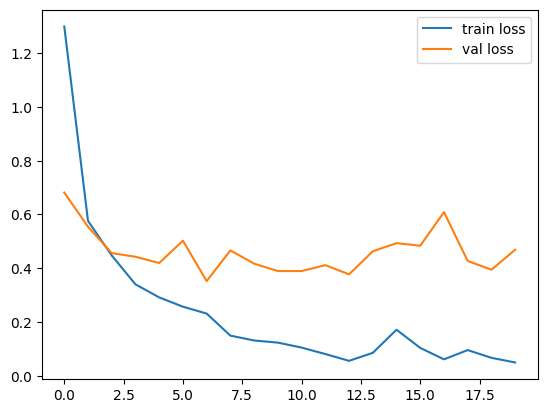

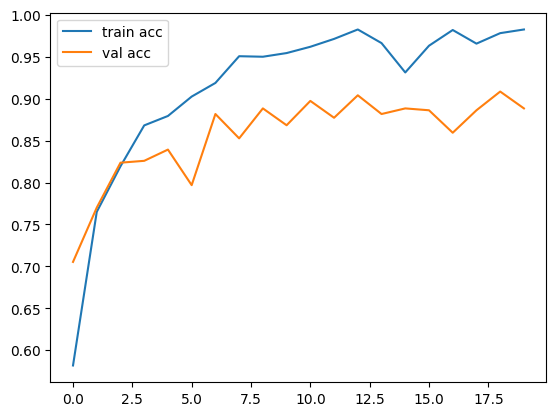

<Figure size 640x480 with 0 Axes>

In [37]:
# plot the loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [38]:
predicted = []
actual = []
for images, labels in test_ds:
  for i in range(5):
    predicted_class, confidence =predict(model, images[i].numpy())
    predicted.append(predicted_class)
    actual.append(class_name[labels[i]])
    # print(predicted_class,class_name[labels[i]])

1/1 [==============================] - 0s 18ms/step


In [39]:
from sklearn.metrics import precision_recall_fscore_support as score
precision, recall, fscore, support = score(actual, predicted)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))


precision: [1.  0.8 1. ]
recall: [0.82352941 1.         1.        ]
fscore: [0.90322581 0.88888889 1.        ]


In [40]:
#creating the confusion matrix
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

con_matrix = confusion_matrix(actual, predicted)
con_matrix

array([[14,  3,  0],
       [ 0, 12,  0],
       [ 0,  0, 11]])

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import itertools

def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:.2}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="black" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="black" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:.2%}; misclass={:.2%}'.format(accuracy, misclass))
    plt.show()

# Example usage:
# Assuming cm is your confusion matrix and target_names is a list of class labels
# plot_confusion_matrix(cm, target_names)


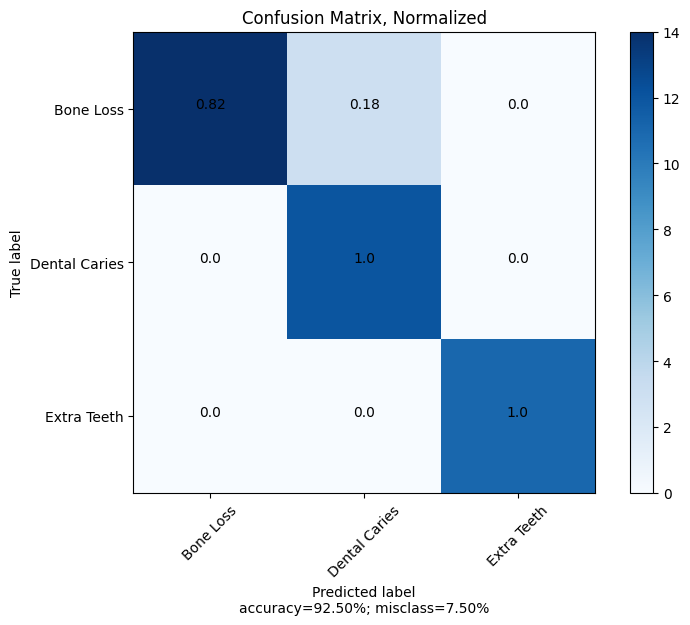

In [42]:
plot_confusion_matrix(cm           = con_matrix,
                      normalize    = True,
                      target_names = class_name,
                      title        = "Confusion Matrix, Normalized")

# VGG19

In [43]:
#vgg19 model
conv_base = VGG19(
    include_top=False,
    weights='imagenet',
    input_shape = (299,299,3))


for layer in conv_base.layers:
    layer.trainable = False


x = conv_base.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dense(1024, activation='relu')(x)
predictions = layers.Dense(3, activation='softmax')(x)
model = Model(conv_base.input, predictions)
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

80134624/80134624 [==============================] - 1s 0us/step


In [44]:
#Train the model
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=20
)

Epoch 1/20
50/50 [==============================] - 19s 362ms/step - loss: 0.9200 - accuracy: 0.6637 - val_loss: 0.7289 - val_accuracy: 0.6585
Epoch 2/20
50/50 [==============================] - 18s 362ms/step - loss: 0.5034 - accuracy: 0.7794 - val_loss: 0.5032 - val_accuracy: 0.7768
Epoch 3/20
50/50 [==============================] - 19s 388ms/step - loss: 0.3682 - accuracy: 0.8537 - val_loss: 0.4344 - val_accuracy: 0.8147
Epoch 4/20
50/50 [==============================] - 18s 370ms/step - loss: 0.2751 - accuracy: 0.8838 - val_loss: 0.3710 - val_accuracy: 0.8683
Epoch 5/20
50/50 [==============================] - 20s 397ms/step - loss: 0.2149 - accuracy: 0.9137 - val_loss: 0.3940 - val_accuracy: 0.8504
Epoch 6/20
50/50 [==============================] - 19s 388ms/step - loss: 0.1770 - accuracy: 0.9312 - val_loss: 0.3853 - val_accuracy: 0.8728
Epoch 7/20
50/50 [==============================] - 19s 389ms/step - loss: 0.1662 - accuracy: 0.9362 - val_loss: 0.3638 - val_accuracy: 0.8929

In [45]:
#Testing the model
scores = model.evaluate(test_ds)

8/8 [==============================] - 2s 301ms/step - loss: 0.3413 - accuracy: 0.9492


first image to predict
actual label: Dental Caries
1/1 [==============================] - 0s 192ms/step
predicted label: Dental Caries


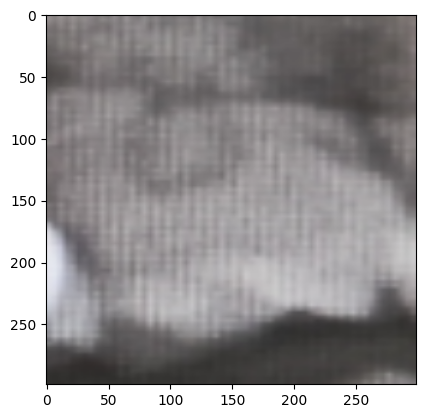

In [46]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    first_image = images_batch[5].numpy().astype('uint8')
    first_label = labels_batch[5].numpy()
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_name[first_label])

    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_name[np.argmax(batch_prediction[5])])

In [47]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_name[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 19ms/step


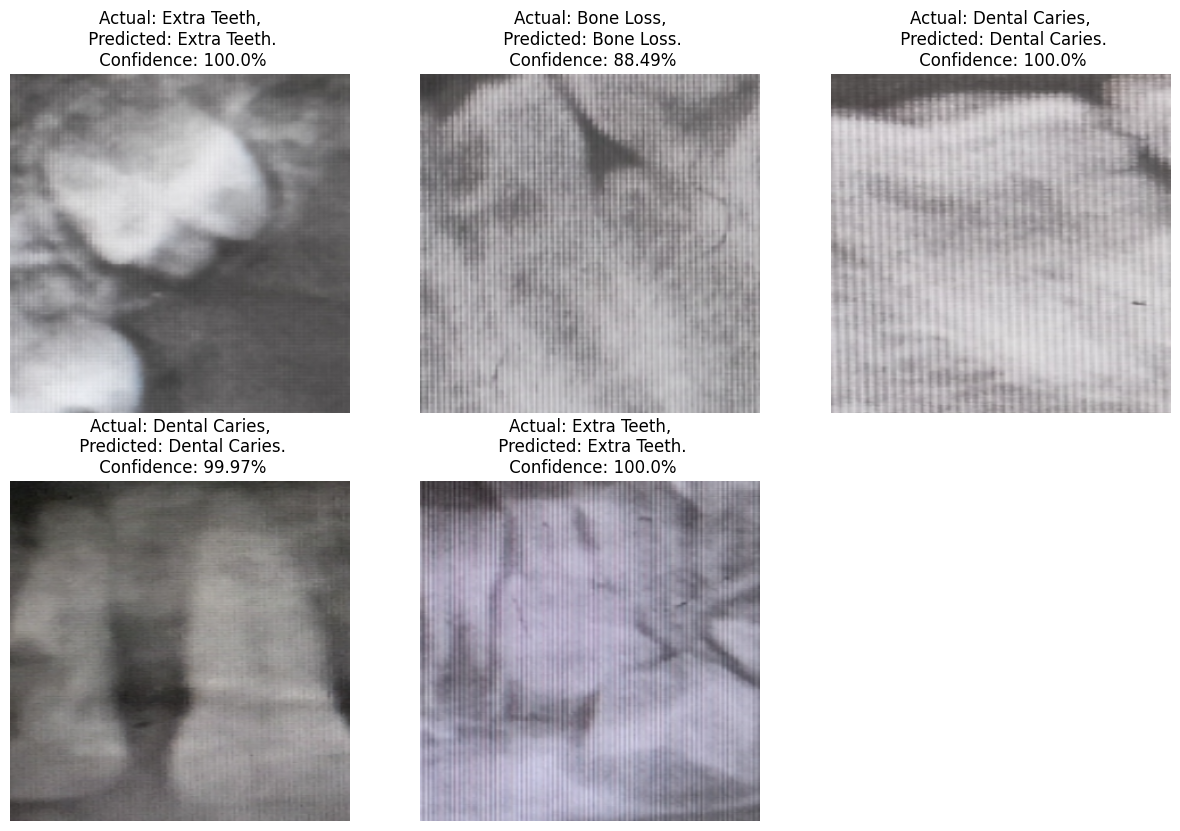

In [48]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(2):
    for i in range(5):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence =predict(model, images[i].numpy())
        actual_class = class_name[labels[i]]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        plt.axis("off")

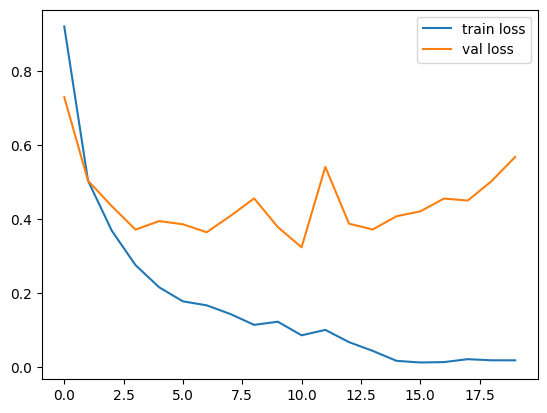

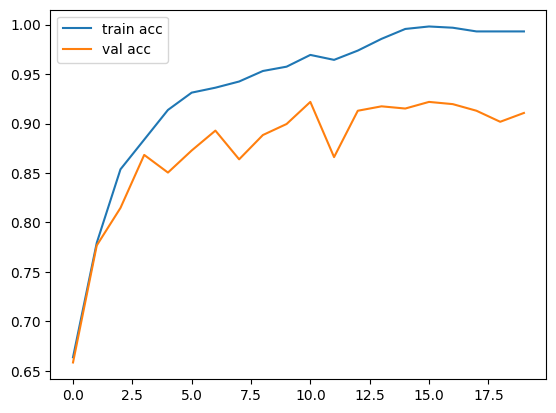

<Figure size 640x480 with 0 Axes>

In [49]:
# plot the loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [50]:
predicted = []
actual = []
for images, labels in test_ds:
  for i in range(5):
    predicted_class, confidence =predict(model, images[i].numpy())
    predicted.append(predicted_class)
    actual.append(class_name[labels[i]])
    print(predicted_class,class_name[labels[i]])

1/1 [==============================] - 0s 19ms/step
Dental Caries Dental Caries
1/1 [==============================] - 0s 18ms/step
Bone Loss Bone Loss
1/1 [==============================] - 0s 18ms/step
Extra Teeth Extra Teeth
1/1 [==============================] - 0s 18ms/step
Dental Caries Dental Caries
1/1 [==============================] - 0s 18ms/step
Extra Teeth Extra Teeth
1/1 [==============================] - 0s 19ms/step
Extra Teeth Extra Teeth
1/1 [==============================] - 0s 18ms/step
Extra Teeth Extra Teeth
1/1 [==============================] - 0s 19ms/step
Dental Caries Dental Caries
1/1 [==============================] - 0s 18ms/step
Bone Loss Bone Loss
1/1 [==============================] - 0s 18ms/step
Extra Teeth Extra Teeth
1/1 [==============================] - 0s 23ms/step
Bone Loss Bone Loss
1/1 [==============================] - 0s 19ms/step
Bone Loss Bone Loss
1/1 [==============================] - 0s 20ms/step
Dental Caries Bone Loss
1/1 [===========

In [51]:
from sklearn.metrics import precision_recall_fscore_support as score
precision, recall, fscore, support = score(actual, predicted)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))

precision: [1.  0.8 1. ]
recall: [0.82352941 1.         1.        ]
fscore: [0.90322581 0.88888889 1.        ]


In [52]:
#creating the confusion matrix
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

con_matrix = confusion_matrix(actual, predicted)
con_matrix

array([[14,  3,  0],
       [ 0, 12,  0],
       [ 0,  0, 11]])

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import itertools

def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:.2}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="black" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="black" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:.2%}; misclass={:.2%}'.format(accuracy, misclass))
    plt.show()

# Example usage:
# Assuming cm is your confusion matrix and target_names is a list of class labels
# plot_confusion_matrix(cm, target_names)


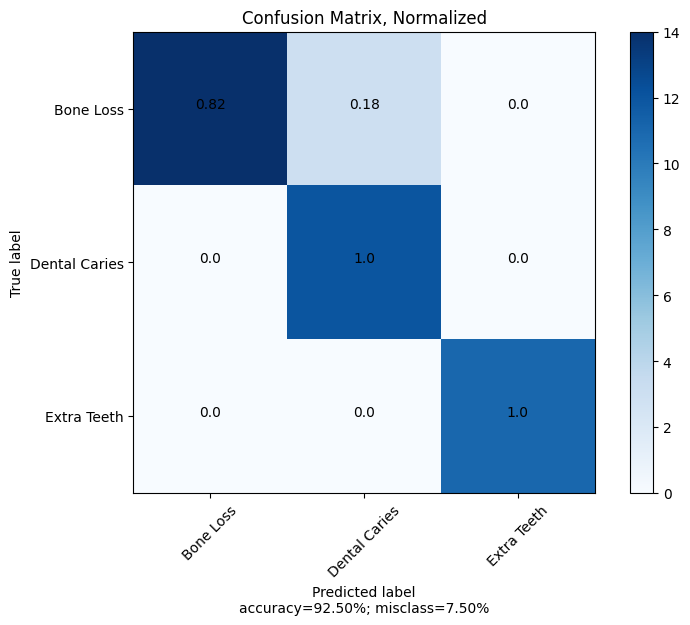

In [54]:
plot_confusion_matrix(cm           = con_matrix,
                      normalize    = True,
                      target_names = class_name,
                      title        = "Confusion Matrix, Normalized")


In [55]:
from sklearn.metrics import classification_report
print(classification_report(actual, predicted, target_names=class_name))

               precision    recall  f1-score   support

    Bone Loss       1.00      0.82      0.90        17
Dental Caries       0.80      1.00      0.89        12
  Extra Teeth       1.00      1.00      1.00        11

     accuracy                           0.93        40
    macro avg       0.93      0.94      0.93        40
 weighted avg       0.94      0.93      0.93        40

